# Predicting Fraud Transactions

In [2]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Fraud.csv')

In [4]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
dataset.shape

(6362620, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

In [8]:
target = 'isFraud'
features = [feature for feature in dataset.columns if feature not in [target]]

In [9]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
dataset.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
import seaborn as sns

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

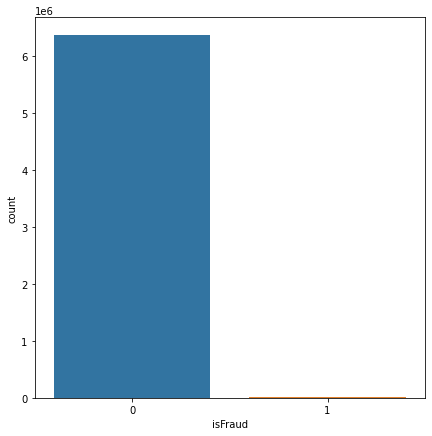

In [12]:
plt.figure(figsize=[7, 7])
sns.countplot(dataset[target])

In [13]:
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

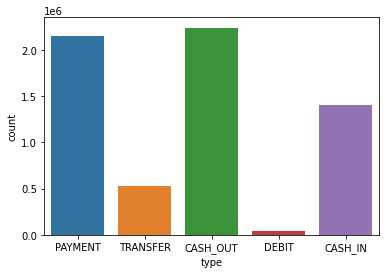

In [14]:
sns.countplot(dataset['type'])

In [15]:
dataset.groupby([target, 'type']).size().unstack(fill_value=0)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

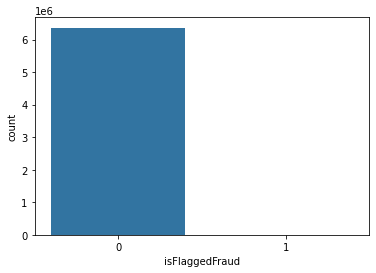

In [16]:
sns.countplot(dataset['isFlaggedFraud'])

In [17]:
dataset['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

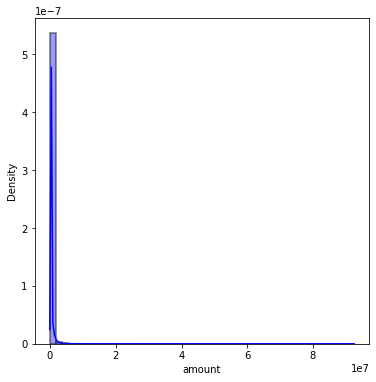

In [18]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['amount'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

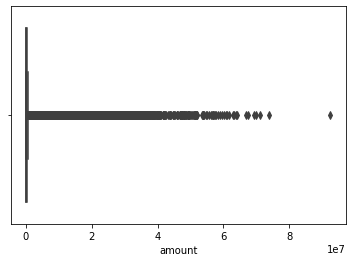

In [19]:
sns.boxplot(dataset['amount'])

In [20]:
dataset['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [21]:
from scipy.stats import zscore
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [22]:
dataset[np.abs(zscore(dataset['amount'])) < 3][target].value_counts()

0    6311148
1       6527
Name: isFraud, dtype: int64

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Density'>

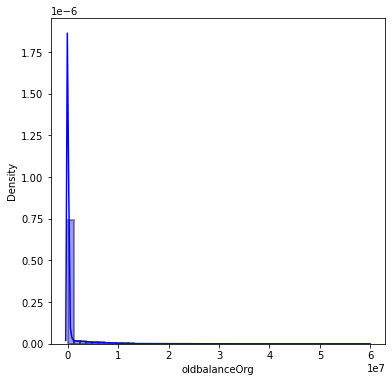

In [23]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['oldbalanceOrg'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

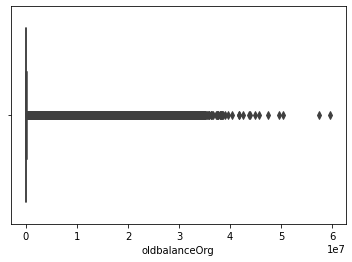

In [24]:
sns.boxplot(dataset['oldbalanceOrg'])

In [25]:
dataset['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [26]:
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
dataset[np.abs(zscore(dataset['oldbalanceOrg'])) < 3][target].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [28]:
dataset[np.abs(zscore(dataset['oldbalanceOrg'])) < 3].shape

(6207480, 11)

In [29]:
dataset.shape

(6362620, 11)

In [30]:
dataset = dataset[np.abs(zscore(dataset['oldbalanceOrg'])) < 3]

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newbalanceOrig', ylabel='Density'>

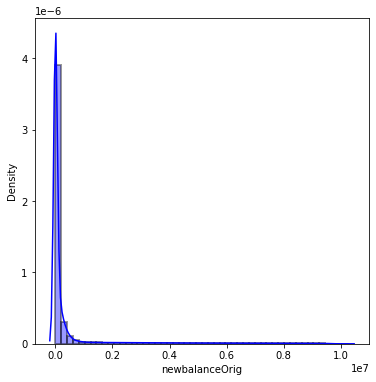

In [31]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['newbalanceOrig'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceOrig'>

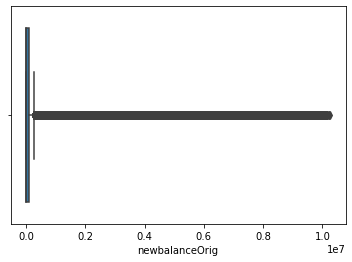

In [32]:
sns.boxplot(dataset['newbalanceOrig'])

In [33]:
dataset[target].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [34]:
dataset[np.abs(zscore(dataset['newbalanceOrig'])) < 3][target].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

In [35]:
dataset.shape


(6207480, 11)

In [36]:
dataset = dataset[np.abs(zscore(dataset['newbalanceOrig'])) < 3]

In [37]:
dataset.shape

(5977751, 11)

In [ ]:
dataset.head()

In [ ]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['oldbalanceDest'], color = 'b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

In [ ]:
dataset.loc[dataset['nameDest'].str.startswith('M')]

In [ ]:
dataset.loc[~dataset['nameDest'].str.startswith('M')]['oldbalanceDest'].describe()

In [ ]:
dataset.loc[~dataset['nameDest'].str.startswith('M')]['newbalanceDest'].describe()

In [ ]:
med_oldbalanceDest = dataset[~dataset['nameDest'].str.startswith('M')]['oldbalanceDest'].median()
dataset.loc[dataset['nameDest'].str.startswith('M'), 'oldbalanceDest'] = med_oldbalanceDest

In [ ]:
med_newbalanceDest = dataset[~dataset['nameDest'].str.startswith('M')]['newbalanceDest'].median()
dataset.loc[dataset['nameDest'].str.startswith('M'), 'newbalanceDest'] = med_newbalanceDest

In [ ]:
dataset['isFlaggedFraud'].value_counts()

In [ ]:
dataset.head()

In [ ]:
display(dataset.describe())

In [ ]:
dataset['oldbalanceOrg'].value_counts()

In [ ]:
dataset['newbalanceOrig'].value_counts()

In [ ]:
dataset.loc[dataset['oldbalanceOrg'] == 0.0, :]

In [ ]:
dataset.loc[dataset['newbalanceOrig'] == 0.0, :]

In [ ]:
dataset.loc[dataset['oldbalanceOrg'] == 0, :].groupby(['type']).size()

In [ ]:
dataset.loc[dataset['newbalanceOrig'] == 0, :].groupby(['type']).size()

In [ ]:
dataset.head()

In [ ]:
dataset.loc[(dataset['oldbalanceOrg'] == 0) & (dataset['nameOrig'].str.startswith('C')), :]

In [ ]:
dataset.loc[(dataset['oldbalanceOrg'] == 0) & (dataset['nameOrig'].str.startswith('C')), :].groupby([target, 'type']).size().unstack()

In [ ]:
dataset.loc[(dataset['oldbalanceOrg'] == 0) & (dataset['nameOrig'].str.startswith('C')), :].groupby([target, 'type']).size().unstack()

In [ ]:
dataset.groupby([target, 'type']).size().unstack()

In [ ]:
dataset['nameOrig'].str.startswith('C').value_counts()

In [ ]:
dataset[dataset['nameDest'].str.startswith('C') & dataset[target] == 1]

In [ ]:
dataset[target].value_counts()

In [ ]:
dataset['nameDest_startswith_C'] = dataset['nameDest'].str.startswith('C')

In [ ]:
dataset['nameDest_startswith_C'].value_counts()

In [ ]:
dataset.groupby([target, 'nameDest_startswith_C']).size().unstack()

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset['nameDest_startswith_C'].value_counts()

In [ ]:
 from sklearn.preprocessing import OrdinalEncoder
dataset[['nameDest_startswith_C']] = OrdinalEncoder(categories=[[False, True]]).fit_transform(dataset[['nameDest_startswith_C']])

In [ ]:
dataset = pd.get_dummies(dataset, columns=['type'], drop_first=True)

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset = dataset.drop(['type_DEBIT', 'type_PAYMENT'], axis=1)

In [ ]:
dataset.shape

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop([target], axis=1)
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=403)
X_train.reset_index(drop=True, inplace=True)

print('Original dataset size --> ({}, {})'.format(dataset.shape[0], dataset.shape[1]))
print('Training set size --> ({}, {})'.format(X_train.shape[0], X_train.shape[1]))
print('Testing set size --> ({}, {})'.format(X_test.shape[0], X_test.shape[1]))

In [ ]:
X_train.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print('---- Standardizing the training set -----')
X_train[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.fit_transform(X_train.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_train_std = pd.DataFrame(X_train, columns=X_train.columns)
display(X_train_std.describe())

print('---- Standardizing the testing set ----')
X_test[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.transform(X_test.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_test_std = pd.DataFrame(X_test, columns=X_train.columns)
display(X_test_std.describe())

In [ ]:
plt.figure(figsize=[12, 10])

sns.heatmap(dataset.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

In [ ]:
y_train_ = y_train.values
y_test_ = y_test.values

In [ ]:
X_train_std.shape

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight='balanced', classes=[0, 1], y = y_train_)

In [ ]:
X_train_std.head()

In [ ]:
X_train_std = X_train_std.drop(['isFlaggedFraud'], axis=1)
X_test_std = X_test_std.drop(['isFlaggedFraud'], axis=1)


In [ ]:
X_train_std = X_train_std.drop(['isFlaggedFraud'], axis=1)
X_test_std = X_test_std.drop(['isFlaggedFraud'], axis=1)


In [ ]:
X_train_std = X_train_std.drop(['nameOrig', 'nameDest'], axis=1)
X_test_std = X_test_std.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, class_weight='balanced', n_jobs=-1)
RF.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = RF.predict(X_train_std)
pred2 = RF.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BC = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), n_estimators=100, n_jobs=-1)
BC.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = BC.predict(X_train_std)
pred2 = BC.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train_std)
pred2 = model.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))